In [23]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator

In [24]:
#from sklearn.datasets.california_housing import fetch_california_housing
df = pd.read_csv('../csvs/initial_orbital_elements.csv', index_col=0)
del df['instability_time']
del df['Rel_Eerr']
Nrows = df.shape[0]
df.head()
print Nrows, len(np.where(df['Stable']==0)[0])

14999 9075


In [25]:
df_X= df.ix[:,2:]
df_Y=df['Stable']
df_X.head()


,RHill12,RHill23,beta12,beta23,m1,a1,P1,e1,pomega1,inc1,...,Omega2,f2,m3,a3,P3,e3,pomega3,inc3,Omega3,f3
0,0.026033,0.023222,8.508586,15.826967,3.414016e-05,1.0,0.999983,0.005031,3.171041,0.008978,...,1.573978,-0.567081,1.826900e-06,1.589043,2.003050,0.002515,-0.108162,0.065498,-1.192440,-0.614709
1,0.022704,0.031284,8.397002,15.367618,2.529838e-07,1.0,1.000000,0.010350,-3.564030,0.001541,...,-1.749616,1.437355,1.955797e-05,1.671403,2.160777,0.072450,-0.343874,0.046939,-0.619350,0.192203
2,0.036304,0.032149,3.461288,25.229467,7.380789e-05,1.0,0.999963,0.051912,0.995149,0.016289,...,-0.032550,-0.317958,1.477931e-07,1.936762,2.695151,0.003395,3.419165,0.014535,2.795101,1.685406
3,0.011704,0.014963,18.513681,19.145889,5.174804e-07,1.0,1.000000,0.000152,-3.328433,0.003301,...,0.946351,-2.294238,1.287851e-06,1.503164,1.842927,0.057380,-0.829096,0.098014,-2.995941,-1.625763
4,0.006199,0.008634,5.494196,2.928938,5.106746e-07,1.0,1.000000,0.001457,1.738448,0.033910,...,-0.455684,-1.074927,1.542321e-06,1.059346,1.090326,0.010325,-1.214839,0.011840,-1.253823,1.215392


In [26]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions

In [27]:
#from sklearn.datasets.california_housing import fetch_california_housing
#cal_housing = fetch_california_housing()
#data = cal_housing.data
#target = cal_housing.target
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(cal_housing.data,cal_housing.target,test_size=0.2, random_state=1)
Nrows = int(df_X.shape[0]*0.05)
print Nrows
#df = pd.DataFrame(data)
#dfY = pd.DataFrame(target)
small_data= df_X.iloc[:Nrows, :]
small_target = df_Y.iloc[:Nrows]
#small_data = df.iloc[:Nrows, :]
#small_target = dfY.iloc[:Nrows]

749


In [13]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth = 8) 
print small_data.shape, small_target.shape
print type(small_data), 
#model.fit(small_data, small_target)

(749, 28) (749,)
<class 'pandas.core.frame.DataFrame'>


Create a grid of the two values we're looking at median age, average occupance

In [8]:
int_size = 20
print  np.min(df["RHill12"]), np.max(df["RHill12"]) , np.min(df["RHill23"]), np.max(df["RHill23"])
val1 = np.linspace(np.min(df["RHill12"]), np.max(df["RHill12"]), int_size)
val2 = np.linspace(np.min(df["RHill23"]), np.max(df["RHill23"]), int_size)

0.00406083057608 0.0403594172079 0.00413078539183 0.0401955604204


In [21]:
model = XGBClassifier(n_estimators=100, learning_rate=1, max_depth = 3)
small_d = small_data.as_matrix()
small_t = small_target.as_matrix()
print small_d.shape, small_t.shape
#model.fit(small_d, small_t)


(749, 28) (749,)


In [10]:
print df_X.shape[1]
iterations = [0]*400
for i in range (0,20):
      for j in range(0,20):
            iterations[(i*20)+j] = (val1[i], val2[j])
print iterations

28
[(0.0040608305760802144, 0.0041307853918256957), (0.0040608305760802144, 0.0060289314459586064), (0.0040608305760802144, 0.0079270775000915162), (0.0040608305760802144, 0.0098252235542244278), (0.0040608305760802144, 0.011723369608357338), (0.0040608305760802144, 0.013621515662490247), (0.0040608305760802144, 0.015519661716623157), (0.0040608305760802144, 0.017417807770756067), (0.0040608305760802144, 0.019315953824888977), (0.0040608305760802144, 0.021214099879021887), (0.0040608305760802144, 0.023112245933154797), (0.0040608305760802144, 0.025010391987287706), (0.0040608305760802144, 0.02690853804142062), (0.0040608305760802144, 0.028806684095553529), (0.0040608305760802144, 0.030704830149686439), (0.0040608305760802144, 0.032602976203819349), (0.0040608305760802144, 0.034501122257952259), (0.0040608305760802144, 0.036399268312085169), (0.0040608305760802144, 0.038297414366218079), (0.0040608305760802144, 0.040195560420350988), (0.0059712825040717562, 0.0041307853918256957), (0.00

In [11]:
# new data set with the varying parameters of interest
new_data = np.zeros((small_data.shape[0], small_data.shape[1],400)) 
print new_data.shape
#new_data = pd.DataFrame(new_data, columns= list(df_X.columns.values))
#small_data['RHill12']=1

(750, 28, 400)


In [12]:
#change all the values in the data to the one you are interested in
for i, val in enumerate(iterations):
    small_data['RHill12'] = val[0]
    small_data['RHill23'] = val[1]
    new_data[:,:,i]= small_data.as_matrix()
    

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
# ensure that you altered the values properly 
print new_data[:2,:,3] # only the first and second of each entry should be the same

[[  4.06083058e-03   9.82522355e-03   8.50858576e+00   1.93326679e+01
    3.41401602e-05   1.00000000e+00   9.99982930e-01   5.03089897e-03
    3.17104104e+00   8.97829577e-03   1.77083940e+00  -1.53432744e+00
    1.87872498e-05   1.22150176e+00   1.34998720e+00   5.93908859e-02
    3.88532699e+00   1.46812853e-02   1.57397776e+00  -5.67080998e-01
    1.82689986e-06   1.58904337e+00   2.00304975e+00   2.51451261e-03
   -1.08162044e-01   6.54976579e-02  -1.19244027e+00  -6.14709463e-01]
 [  4.06083058e-03   9.82522355e-03   8.39700175e+00   1.82974151e+01
    2.52983812e-07   1.00000000e+00   9.99999874e-01   1.03501283e-02
   -3.56402962e+00   1.54070387e-03  -1.49363829e+00   1.32327235e-02
    3.48578993e-05   1.19064748e+00   1.29917356e+00   1.30477081e-02
   -3.48473503e+00   1.13944916e-03  -1.74961558e+00   1.43735543e+00
    1.95579737e-05   1.67140327e+00   2.16077726e+00   7.24497600e-02
   -3.43874362e-01   4.69386082e-02  -6.19349550e-01   1.92202532e-01]]


In [14]:
varying_pred = np.zeros((new_data.shape[0], new_data.shape[2]))
print varying_pred.shape
varyin_pred_mean = np.zeros(400)
print new_data.shape, varying_pred.shape

(750, 400)
(750, 28, 400) (750, 400)


In [15]:
#model = XGBClassifier(n_estimators=100, learning_rate=1, max_depth = 3, seed=1)
#model.fit(X_train, y_train)
print type(new_data[:,:,i]), new_data.shape
for i in range (len(iterations)):
    #print varying_pred[:,:,i].shape, new_data[:,:,i].shape
    varying_pred[:,i] =model.predict_proba(new_data[:,:,i])[:,1] # i = 400
    varyin_pred_mean[i] = np.mean(varying_pred[:,i])

<type 'numpy.ndarray'> (750, 28, 400)


In [58]:
## ALREADY DONE IN THE CELL ABOVE< THIS WAS JUST TO TRY TO MULTI THREAD THE ABOVE PREDICTIOS 
## IF YOU ARE DOING LOTS OF THEM FOR A MORE REFINED GRID
sections = np.linspace(0,varying_pred.shape[0], 11, dtype='int')
print sections

import thread
from multiprocessing import Pool
# do above cell in parallel
sections = np.linspace(0,varying_pred.shape[0], 11)

def thread_pred(varying_preds):
    for i in range (varying_pred.shape[0]):
        varying_pred[i]=model.predict_proba(new_data[:,:,i]) # i = 400
        varyin_pred_mean[i] = np.mean(varying_pred[:,:,i])


        
#Initialize the threads
try:
    p = Pool(10)
    p.map(thread_pred, varying_pred[sections])
except:
    print Exception

[  0  74 149 224 299 374 449 524 599 674 749]


In [88]:
print varyin_pred_mean

[ 0.40905704  0.40905704  0.40805899  0.41513293  0.41513293  0.41513293
  0.41087651  0.41339774  0.41254238  0.42198353  0.42113979  0.42113979
  0.42113979  0.43080356  0.43080356  0.43080356  0.43080356  0.43080356
  0.43080356  0.43080356  0.40905704  0.40905704  0.40805899  0.41513293
  0.41513293  0.41513293  0.41087651  0.41339774  0.41254238  0.42198353
  0.42113979  0.42113979  0.42113979  0.43080356  0.43080356  0.43080356
  0.43080356  0.43080356  0.43080356  0.43080356  0.40905704  0.40905704
  0.40805899  0.41513293  0.41513293  0.41513293  0.41087651  0.41339774
  0.41254238  0.42198353  0.42113979  0.42113979  0.42113979  0.43080356
  0.43080356  0.43080356  0.43080356  0.43080356  0.43080356  0.43080356
  0.3724607   0.3724607   0.37124476  0.41203914  0.41203914  0.41203914
  0.4078499   0.41032285  0.40951088  0.4185      0.41768415  0.41768415
  0.41768415  0.42643621  0.42643621  0.42643621  0.42643621  0.42643621
  0.42643621  0.42643621  0.3724607   0.3724607   0

In [16]:
x_list = [x[0] for x in iterations]
y_list = [x[1] for x in iterations]

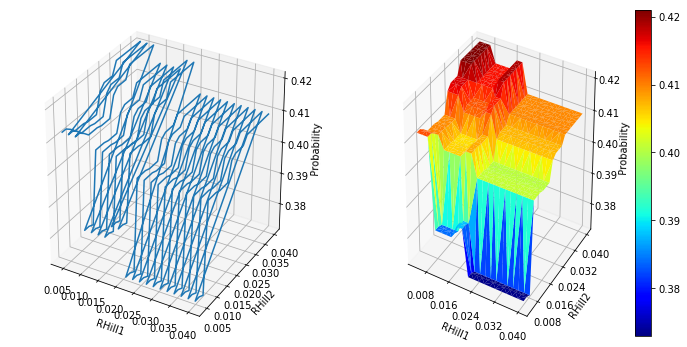

In [17]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(x_list, y_list, varyin_pred_mean)
ax.set_xlabel('RHill1')
ax.set_ylabel('RHill2')
ax.set_zlabel('Probability')

ax = fig.add_subplot(122, projection='3d')

surf = ax.plot_trisurf(x_list, y_list, varyin_pred_mean, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
ax.set_xlabel('RHill1')
ax.set_ylabel('RHill2')
ax.set_zlabel('Probability')
#ax.plot_surface(x_list, y_list, varyin_pred_mean)
plt.show()

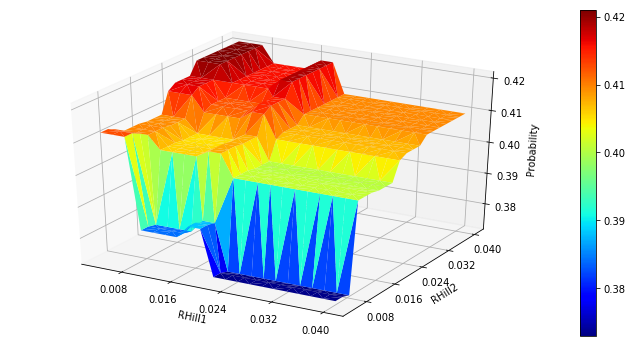

In [18]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(x_list, y_list, varyin_pred_mean, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
ax.set_xlabel('RHill1')
ax.set_ylabel('RHill2')
ax.set_zlabel('Probability')
#ax.plot_surface(x_list, y_list, varyin_pred_mean)
plt.show()

In [6]:
int_size = 20
print  np.min(df["beta12"]), np.max(df["beta12"]) , np.min(df["beta23"]), np.max(df["beta23"])
val1 = np.linspace(np.min(df["beta12"]), np.max(df["beta12"]), int_size)
val2 = np.linspace(np.min(df["beta23"]), np.max(df["beta23"]), int_size)

1.00114696243 29.9995900206 1.00111804631 29.9996336841


In [7]:
#create grid of alternating values
iterations = [0]*400
for i in range (0,20):
      for j in range(0,20):
            iterations[(i*20)+j] = (val1[i], val2[j])
print iterations

[(1.001146962430207, 1.0011180463075555), (1.001146962430207, 2.5273557114558645), (1.001146962430207, 4.053593376604173), (1.001146962430207, 5.5798310417524828), (1.001146962430207, 7.1060687069007908), (1.001146962430207, 8.6323063720491007), (1.001146962430207, 10.158544037197409), (1.001146962430207, 11.684781702345719), (1.001146962430207, 13.211019367494027), (1.001146962430207, 14.737257032642335), (1.001146962430207, 16.263494697790644), (1.001146962430207, 17.789732362938956), (1.001146962430207, 19.315970028087264), (1.001146962430207, 20.842207693235572), (1.001146962430207, 22.368445358383884), (1.001146962430207, 23.894683023532192), (1.001146962430207, 25.4209206886805), (1.001146962430207, 26.947158353828808), (1.001146962430207, 28.473396018977116), (1.001146962430207, 29.999633684125428), (2.5273808075955104, 1.0011180463075555), (2.5273808075955104, 2.5273557114558645), (2.5273808075955104, 4.053593376604173), (2.5273808075955104, 5.5798310417524828), (2.527380807595

In [15]:
# new data set with the varying parameters of interest
new_data = np.zeros((small_data.shape[0], small_data.shape[1],400)) 

for i, val in enumerate(iterations):
    small_data['beta12'] = val[0]
    small_data['beta23'] = val[1]
    new_data[:,:,i]= small_data.as_matrix()
print new_data[:2,:,1]

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[[  2.60327349e-02   2.32224919e-02   1.00114696e+00   2.52735571e+00
    3.41401602e-05   1.00000000e+00   9.99982930e-01   5.03089897e-03
    3.17104104e+00   8.97829577e-03   1.77083940e+00  -1.53432744e+00
    1.87872498e-05   1.22150176e+00   1.34998720e+00   5.93908859e-02
    3.88532699e+00   1.46812853e-02   1.57397776e+00  -5.67080998e-01
    1.82689986e-06   1.58904337e+00   2.00304975e+00   2.51451261e-03
   -1.08162044e-01   6.54976579e-02  -1.19244027e+00  -6.14709463e-01]
 [  2.27042329e-02   3.12836905e-02   1.00114696e+00   2.52735571e+00
    2.52983812e-07   1.00000000e+00   9.99999874e-01   1.03501283e-02
   -3.56402962e+00   1.54070387e-03  -1.49363829e+00   1.32327235e-02
    3.48578993e-05   1.19064748e+00   1.29917356e+00   1.30477081e-02
   -3.48473503e+00   1.13944916e-03  -1.74961558e+00   1.43735543e+00
    1.95579737e-05   1.67140327e+00   2.16077726e+00   7.24497600e-02
   -3.43874362e-01   4.69386082e-02  -6.19349550e-01   1.92202532e-01]]


In [16]:
varying_pred = np.zeros((new_data.shape[0], new_data.shape[2]))
varyin_pred_mean = np.zeros(400)

In [28]:
#fit the model first 
model2 = XGBClassifier(n_estimators=225, learning_rate=1, max_depth = 3)
small_d = small_data.as_matrix()
small_t = small_target.as_matrix()
model2.fit(small_d, small_t)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=225, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [29]:
#do all the testings
print type(new_data[:,:,i]), new_data.shape
for i in range (len(iterations)):
    #print varying_pred[:,:,i].shape, new_data[:,:,i].shape
    varying_pred[:,i] =model2.predict_proba(new_data[:,:,i])[:,1] # i = 400
    varyin_pred_mean[i] = np.mean(varying_pred[:,i])

<type 'numpy.ndarray'> (749, 28, 400)


In [34]:
x_list2 = [x[0] for x in iterations]
y_list2 = [x[1] for x in iterations]
print varyin_pred_mean[:10]

[ 0.01305012  0.01305012  0.01305012  0.02229565  0.02863317  0.0396598
  0.06982148  0.06982148  0.08112569  0.11612701]


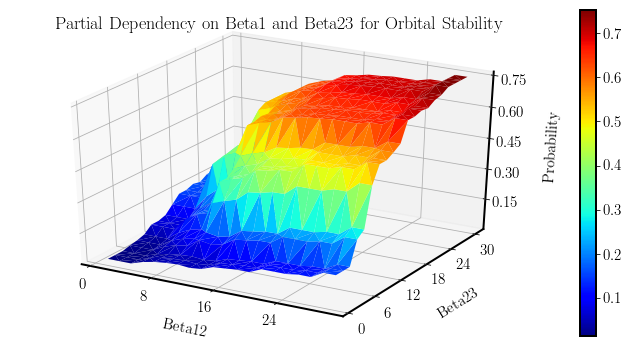

In [32]:
from matplotlib import rc, cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator

rc('text',usetex=True)
rc('font',family='serif')
rc('font',serif='cm')
rc('font',size=15,weight='black',stretch='extra-expanded',style='oblique')
rc('axes',linewidth=2)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111, projection='3d')

#surf = ax.plot_trisurf(x_list2, y_list2, varyin_pred_mean, cmap=cm.jet, linewidth=0)
#ax.scatter()
fig.colorbar(surf)
ax.tick_params(axis='both', which='major', pad=3)
#ax.rcParams['ytick.major.pad']='8'

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
ax.set_xlabel('Beta12', labelpad=15)
ax.set_ylabel('Beta23', labelpad=15)
ax.set_zlabel('Probability', labelpad=15)
ax.set_title('Partial Dependency on Beta1 and Beta23 for Orbital Stability')
#ax.plot_surface(x_list, y_list, varyin_pred_mean)
#ax.ad
plt.show()